In [1]:
import sys
import os
import matplotlib.pyplot as plt
import cv2

import numpy as np

# Add the src directory to the path. TEMPORARY FIX
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))

from src.data_processing.dataset_loader import CoastData
from src.data_processing.dataset_preprocessor_bilstm import DatasetPreprocessorBiLSTM

In [14]:
data_path = os.path.abspath(os.path.join(os.getcwd(), "../../data/raw/SCLabels_v1.0.0/"))

# Load the data, all the different stations
data = CoastData(data_path, name="cadiz")

filtered_data = data.get_images_and_masks() 

print(filtered_data)

# filtered_data = data.split_data()

# Get the first image and mask
index = 0
image_path = filtered_data[index]['image']
mask_path = filtered_data[index]['mask']

print("Image:", image_path)
print("Mask:", mask_path)

CoastData: cadiz - 946 images
[{'image': '/Users/josep/Documents/SOCIB/Shoreline-extraction/data/raw/SCLabels_v1.0.0/images/1602845999.Fri.Oct.16_11_59_59.CET.2020.cadiz.image.jpg', 'mask': '/Users/josep/Documents/SOCIB/Shoreline-extraction/data/raw/SCLabels_v1.0.0/masks/1602845999.Fri.Oct.16_11_59_59.CET.2020.cadiz.mask.png'}, {'image': '/Users/josep/Documents/SOCIB/Shoreline-extraction/data/raw/SCLabels_v1.0.0/images/1602847056.Fri.Oct.16_12_17_36.CET.2020.cadiz.image.jpg', 'mask': '/Users/josep/Documents/SOCIB/Shoreline-extraction/data/raw/SCLabels_v1.0.0/masks/1602847056.Fri.Oct.16_12_17_36.CET.2020.cadiz.mask.png'}, {'image': '/Users/josep/Documents/SOCIB/Shoreline-extraction/data/raw/SCLabels_v1.0.0/images/1602847144.Fri.Oct.16_12_19_04.CET.2020.cadiz.image.jpg', 'mask': '/Users/josep/Documents/SOCIB/Shoreline-extraction/data/raw/SCLabels_v1.0.0/masks/1602847144.Fri.Oct.16_12_19_04.CET.2020.cadiz.mask.png'}, {'image': '/Users/josep/Documents/SOCIB/Shoreline-extraction/data/raw/SC

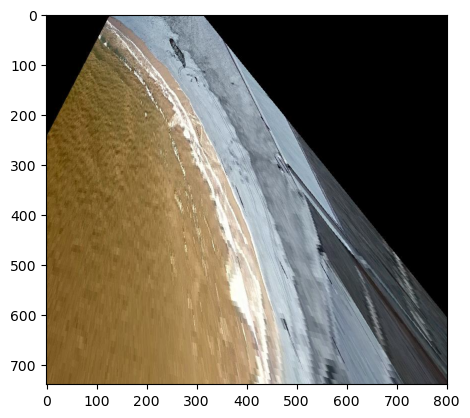

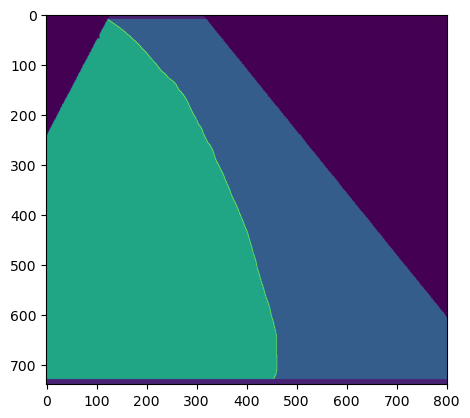

In [15]:
image = cv2.imread(image_path)
plt.imshow(image)
plt.show()
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(mask)

Image shape: (739, 801, 3)
Mask shape: (739, 801)


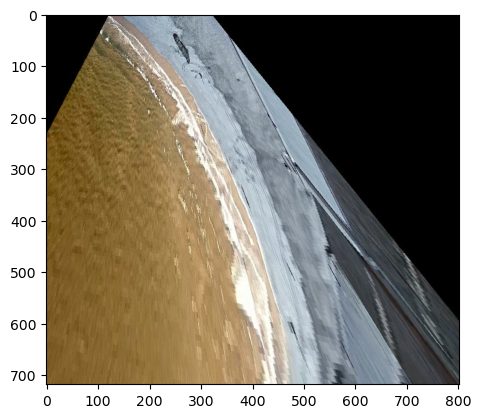

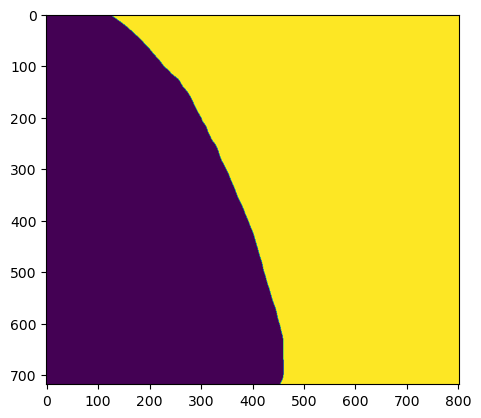

In [16]:
dataset_preprocessor_bilstm = DatasetPreprocessorBiLSTM()

image = dataset_preprocessor_bilstm.load_image(image_path)
mask = dataset_preprocessor_bilstm.load_mask(mask_path)

print("Image shape:", image.shape)
print("Mask shape:", mask.shape)

mapping = {
    0: 2,    # Background → Class 2 (after the mapping, we will transform it to binary)
    25: 2,   # Not classified → Class 2 (after the mapping, we will transform it to binary)
    75: 1,   # Land → Class 2
    150: 0,  # Sea → Class 3
    255: 1   # Shoreline → Class 4
}

new_image, new_mask = dataset_preprocessor_bilstm.process_image(image, mask, mask_mapping=mapping)

plt.imshow(new_image)
plt.show()  

plt.imshow(new_mask)
plt.show()

In [ ]:
new_data_path = os.path.abspath(os.path.join(os.getcwd(), "../../data/processed_bilstm_cadiz/"))
dataset_preprocessor_bilstm.preprocess_from_metadata(metadata=data.metadata, dataset_path=filtered_data, dataset_output_path=new_data_path, mask_mapping=mapping)

In [12]:
data_path = os.path.abspath(os.path.join(os.getcwd(), "../../data/processed_bilstm_arenaldentem/"))

# Load the data, all the different stations
data = CoastData(data_path, name="arenaldentem")

filtered_data = data.get_images_and_masks() 

print(filtered_data)

# filtered_data = data.split_data()

# Get the first image and mask
index = 2
image_path = filtered_data[index]['image']
mask_path = filtered_data[index]['mask']

print("Image:", image_path)
print("Mask:", mask_path)

CoastData: arenaldentem - 40 images
[{'image': '/Users/josep/Documents/SOCIB/Shoreline-extraction/data/processed_bilstm_arenaldentem/images/1661756929.Mon.Aug.29_08_08_49.CET.2022.arenaldentem.image.jpg', 'mask': '/Users/josep/Documents/SOCIB/Shoreline-extraction/data/processed_bilstm_arenaldentem/masks/1661756929.Mon.Aug.29_08_08_49.CET.2022.arenaldentem.mask.png'}, {'image': '/Users/josep/Documents/SOCIB/Shoreline-extraction/data/processed_bilstm_arenaldentem/images/1663582740.Mon.Sep.19_11_19_00.CET.2022.arenaldentem.image.jpg', 'mask': '/Users/josep/Documents/SOCIB/Shoreline-extraction/data/processed_bilstm_arenaldentem/masks/1663582740.Mon.Sep.19_11_19_00.CET.2022.arenaldentem.mask.png'}, {'image': '/Users/josep/Documents/SOCIB/Shoreline-extraction/data/processed_bilstm_arenaldentem/images/1664092920.Sun.Sep.25_09_02_00.CET.2022.arenaldentem.image.jpg', 'mask': '/Users/josep/Documents/SOCIB/Shoreline-extraction/data/processed_bilstm_arenaldentem/masks/1664092920.Sun.Sep.25_09_02_0

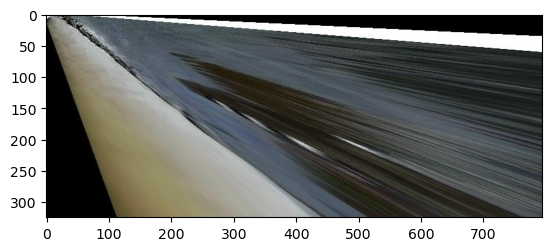

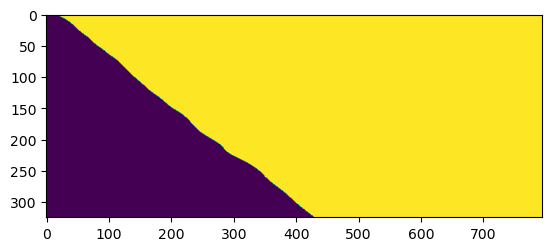

In [13]:
image = cv2.imread(image_path)
plt.imshow(image)
plt.show()
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(mask)